# Desafio Sprint 03 - Guilherme Donadon

##### Após a instalação, houve a importação das bibliotecas Pandas e Matplotlib

In [2]:
import pandas as pandas
import matplotlib.pyplot as matplot
import matplotlib.colors as mcolors
import seaborn as sns

##### Para a leitura do arquivo CSV foi utilizada a bibioteca Pandas e o comando .drop_duplicates() para garantir que não haveria nenhuma linha duplicada no dataset.

In [3]:
GooglePlay = pandas.read_csv('googleplaystore.csv').drop_duplicates()

## Seleção de Dados

##### 1. Após referenciar o nome correto do dataset/colunas a serem utilizados o primeiro passo foi transformar tudo em tipo string(str).
##### 2. Na parte do código r'^\d', na=False define que as linhas selecionadas são as que começam com um dígito, eliminando assim entradas que não são números ou valores ausentes.
##### 3. Utilizando os comandos replace e regex caracteres indesejados como por exemplo + e , são removidos e em seguida a coluna é convertida para tipo inteiro(int).
##### 4. O código nlargest é usado para selecionar apenas 5 valores.

## Configuração de Cores

##### 5. Na primeira linha len foi usado para representar as 5 barras que seriam criadas já que a seleção anterior era para 5 valores diferentes.
##### 6. Os codigos aqui usados foram para criar um mapa de cores a ser usado nas colunas com as cores selecionadas sendo citadas.
##### 7. Após criado o mapa de cores a próxima linha foi configurado como seriam aplicadas as cores que foram num intervalo de 0 e 1 e armazena as cores para cada barra.

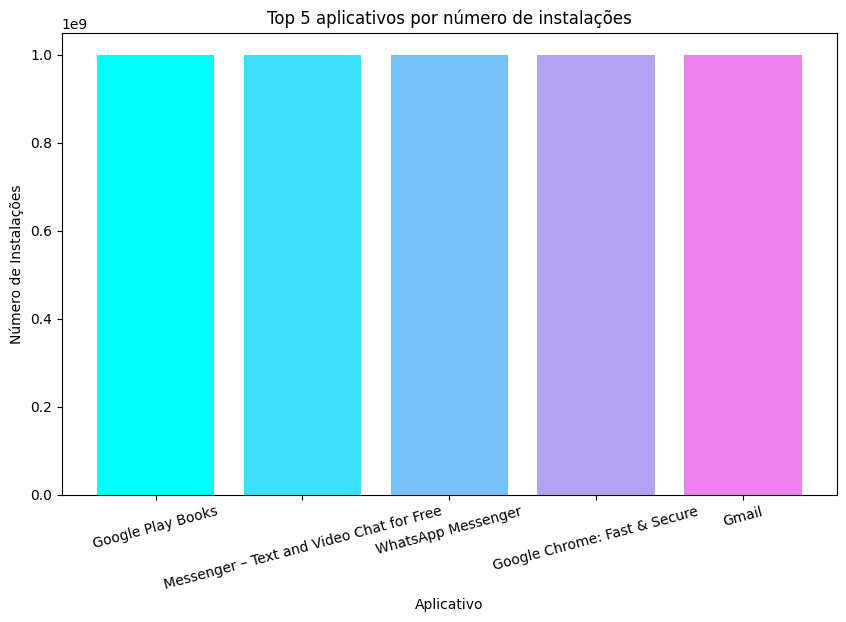

In [4]:
GooglePlay['Installs'] = GooglePlay['Installs'].astype(str)
GooglePlay = GooglePlay[GooglePlay['Installs'].str.contains(r'^\d', na=False)]
GooglePlay['Installs'] = GooglePlay['Installs'].replace({'[+,]': ''}, regex=True).astype(int)
Top5_Apps = GooglePlay.nlargest(5, 'Installs')[['App', 'Installs']]

num_barras = len(Top5_Apps)
mapa_cores = mcolors.LinearSegmentedColormap.from_list('meu_mapa_cores', ['cyan', 'violet'], num_barras)
colors = [mapa_cores(i / (num_barras - 1)) for i in range(num_barras)]

matplot.figure(figsize=(10, 6))
matplot.bar(Top5_Apps['App'], Top5_Apps['Installs'], color=colors)
matplot.ylabel('Número de Instalações')
matplot.xlabel('Aplicativo')
matplot.title('Top 5 aplicativos por número de instalações')
matplot.xticks(rotation=15)
matplot.show()

##### 1. Foi utilizado o codigo value_counts para a contagem de categorias dos aplicativos apresentados no data set por catoria.
##### 2. Para a plotagem do gráfico após a definição dos valores a serem exibidos, os nomes das categorias se tornam o nome de cada parte do gráfico e o coódigo %1.1f%% exibe a porcentagem de cada categoria dentro do gráfico com uma casa decimal. Starangle e textprops={fontsize} definem, respectivamente, o angulo do grágico e o tamanho da fonte.
##### 3. Após, os três últimos códigos servem para definir o título do gráfico, manter o formato perfeitamente redondo e exibir, respectivamente.

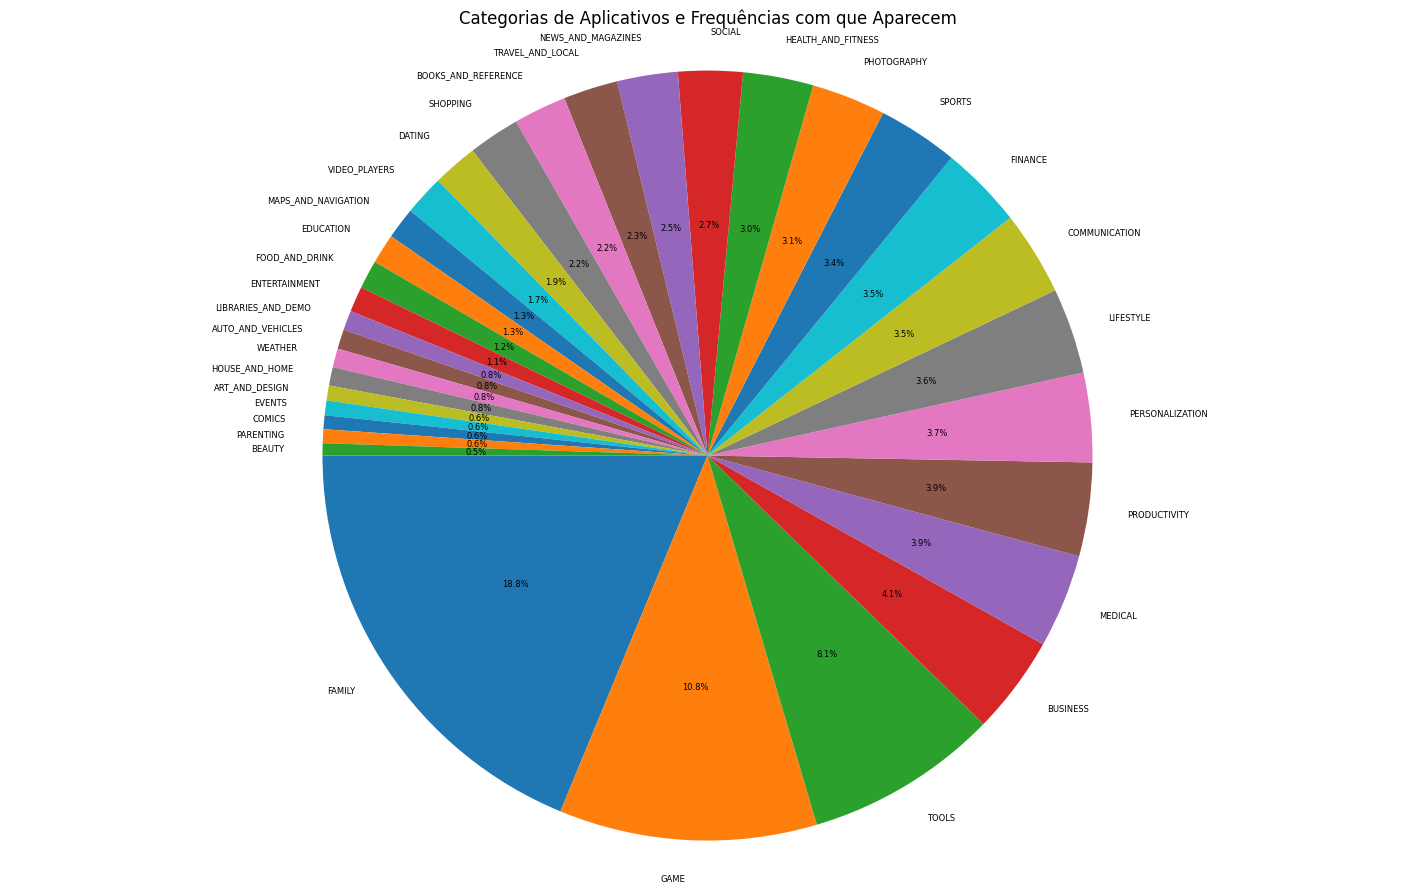

In [5]:
frequencia_categorias = GooglePlay['Category'].value_counts()
matplot.figure(figsize=(18, 11))
matplot.pie(frequencia_categorias, labels=frequencia_categorias.index, autopct='%1.1f%%', startangle=900, textprops={'fontsize': 6})
matplot.title('Categorias de Aplicativos e Frequências com que Aparecem')
matplot.axis('equal')
matplot.show()

##### Para exibir o aplicativo mais caro do dataset primeiro foi preciso um tratamento nos dados para retirar o $ dos valores e os espaços em branco e em seguida converter a coluna toda para tipo float. Para encontrar o valor do mais caro o código idxmax foi usado e em segui o valor, juntamente com as informações do aplicativo foram exibidas usando print.

In [6]:
GooglePlay['Price'] = GooglePlay['Price'].replace({'\$': '', ' ': ''}, regex=True).astype(float)

app_mais_caro = GooglePlay.loc[GooglePlay['Price'].idxmax()]
print("Aplicativo mais caro.")
print(app_mais_caro)

Aplicativo mais caro.
App               I'm Rich - Trump Edition
Category                         LIFESTYLE
Rating                                 3.6
Reviews                                275
Size                                  7.3M
Installs                             10000
Type                                  Paid
Price                                400.0
Content Rating                    Everyone
Genres                           Lifestyle
Last Updated                   May 3, 2018
Current Ver                          1.0.1
Android Ver                     4.1 and up
Name: 4367, dtype: object


##### Para encontrar a quantidade total de aplicativos classificados como Mature 17+ foram buscados os valores da coluna Content Rating para encontrar os que eram iguais ao termo Mature 17+, o comando drop_duplicates foi usado para evitar que dados duplicados fossem contabilizados e juntamente com o subset a busca pode ser efetuada. O comando shape retornava o número de linhas após a filtragem e print exibia o número encontrado ao final.

In [7]:
classificacao_app = GooglePlay[GooglePlay['Content Rating'] == 'Mature 17+'].drop_duplicates(subset=['App']).shape[0]
print(f'Aplicativos classificados como "Mature 17+": {classificacao_app}')

Aplicativos classificados como "Mature 17+": 393


##### Para calcular os aplicativos com maiores números de Reviews primeiramente utilizei pandas.to_numeric para converter os valores para númericos e errors='coerce' para que os valores nulos possam ser tratados caso necessário. em seguida drop_duplicates removeu as entradas duplicadas baseada nas colunas Reviews e Apps e nlargest definiu o valor de entradas a serem coletadas como 10. Após print exibiu o titulo dado aos dados coletados e em seguidas os dados em si.

In [18]:
GooglePlay['Reviews'] = pandas.to_numeric(GooglePlay['Reviews'], errors='coerce')
best_apps = GooglePlay.drop_duplicates(subset=['App']).nlargest(10, 'Reviews')[['App', 'Reviews']]
print(f' Os aplicativos com maiores números de Reviews sao:')
print(f'{best_apps}')

 Os aplicativos com maiores números de Reviews sao:
                                                    App   Reviews
2544                                           Facebook  78158306
336                                  WhatsApp Messenger  69119316
2545                                          Instagram  66577313
335            Messenger – Text and Video Chat for Free  56642847
1670                                     Clash of Clans  44891723
4005            Clean Master- Space Cleaner & Antivirus  42916526
1654                                     Subway Surfers  27722264
3665                                            YouTube  25655305
7536  Security Master - Antivirus, VPN, AppLock, Boo...  24900999
1660                                       Clash Royale  23133508


# Etapas 7 e 8: Estruturação - Um cálculo da etapa 7 e um gráfico da etapa 8 correspondente foram postos em sequência e em seguida o cálculo e o gráfico restante.

##### 1. Assim como em um dos códigos anteriores o primeiro passo foi transformar a coluna Installs em str e remover caracteres indesejados como + e ','.
##### 2. Após limpos os dados foram convertidos para númericos com o comando pandas.to_numeric e qualquer valor não convertido se tornará NaN com errors='coerce'.
##### 3. Em seguida, na coluna Price os valores também foram convertidos para string e então os caracteres $ foram retirados e na próxima linha convertidos para númerico e qualquer valor NaN se tornará 0.
##### 4. A coluna Arrecadacao foi criada multiplicando os valores tratados anteriormente de Installs e Price.

##### 5. Para iniciar o agrumento o termo utilizado foi Category e com agg foram aplicadas funções de agregação: Arrecadacao e Downloads somaram os valores encontrados em arrecadacao e installs anteriormente. o numero maximo de termos a serem exibidos foi configurado em 10 e então para que as categorias se tornassem uma coluna normal ao inves de um índice o comando reset_index foi usado.

##### 6. usando o comando .columns as colunas foram renomeadas para nomes mais fáceis de serem lidos e então print exibiu os textos e resultados.

In [9]:
GooglePlay['Installs'] = GooglePlay['Installs'].astype(str).str.replace('[+,]', '', regex=True)
GooglePlay['Installs'] = pandas.to_numeric(GooglePlay['Installs'], errors='coerce')
GooglePlay['Price'] = GooglePlay['Price'].astype(str).str.replace('$', '')
GooglePlay['Price'] = pandas.to_numeric(GooglePlay['Price'], errors='coerce').fillna(0)
GooglePlay['Arrecadacao'] = GooglePlay['Installs'] * GooglePlay['Price']

Lucro_categorias = GooglePlay.groupby('Category'). agg(
    Arrecadacao=('Arrecadacao', 'sum'),
    Downloads=('Installs', 'sum')
).nlargest(10, 'Arrecadacao').reset_index()

Lucro_categorias.columns = ['categoria', 'Arrecadacao', 'Downloads']
print(f'As categorias que mais arrecaram com Apps pagos são:')
print(Lucro_categorias)

As categorias que mais arrecaram com Apps pagos são:
         categoria   Arrecadacao    Downloads
0           FAMILY  1.857803e+08  10041692505
1        LIFESTYLE  5.758394e+07    534823539
2             GAME  4.098764e+07  31544024415
3          FINANCE  2.572668e+07    770348734
4      PHOTOGRAPHY  8.942768e+06   9721247655
5          MEDICAL  8.456536e+06     42204177
6  PERSONALIZATION  7.786948e+06   2074494782
7            TOOLS  5.464821e+06  11452771915
8           SPORTS  4.706212e+06   1528574498
9     PRODUCTIVITY  4.313375e+06  12463091369


## Dados

##### 1. Dados retirados do cálculo feito acima

## Montagem do gráfico

##### 2. Primeiramente o código para criação de uma figura e conjuntos de eixos foram criados, juntamente com a especificação do tamanho a ser exibido

## Configurações do primeiro eixo (ax1)

##### 3. Após definir a cor a ser usada o eixo X foi nomeado como categoria e após o eixo Y foi nomeado como Número de Downloads e definida a cor do texto. ax1.bar plota um gráfico de barras com as determinações acima. Definição da cor das barras para azul e o codigo alpha define a transparência das barras em uma variação de 0 a 1 à ser escolhida, no caso, 0.6. E por fim ax1.tick_params termina a configuração de cores.

## Configuração do segundo eixo (ax2)

##### 4. Utilizando ax2 = ax1.twinx() faz com que seja criado um eixo y(ax2) que compartilhará o mesmo eixo x(ax1) possibilitando assim a plotagem de um único gráfico porém com duas escalas diferentes. A cor do segundo foi definida para laranja. O nome do segundo eixo será foi definido como Arrecadacão (em $), com o comando ax2.plot uma linha foi criada que representa a arrecadação citada anteriormente na qual a cor é laranja e com o marcador marker='o' um circulo é inserido em cada ponto de dados e por sim a cor terminou de ser configurada.

# Configurações e Layout do gráfico

##### 5. O título foi definido, marcando como False o grid dos dois eixos permite criar uma visualização mais limpa desativando as linhas de grade e xticks rotacionou o titulo do eixo x em 45 graus para melhor leitura
##### 6. fig.tight_layout ajustou automaticamente o grágico para que os elementos se encaixassem de maneira a evitar a sobreposição e por fim o gráfico foi exibido.

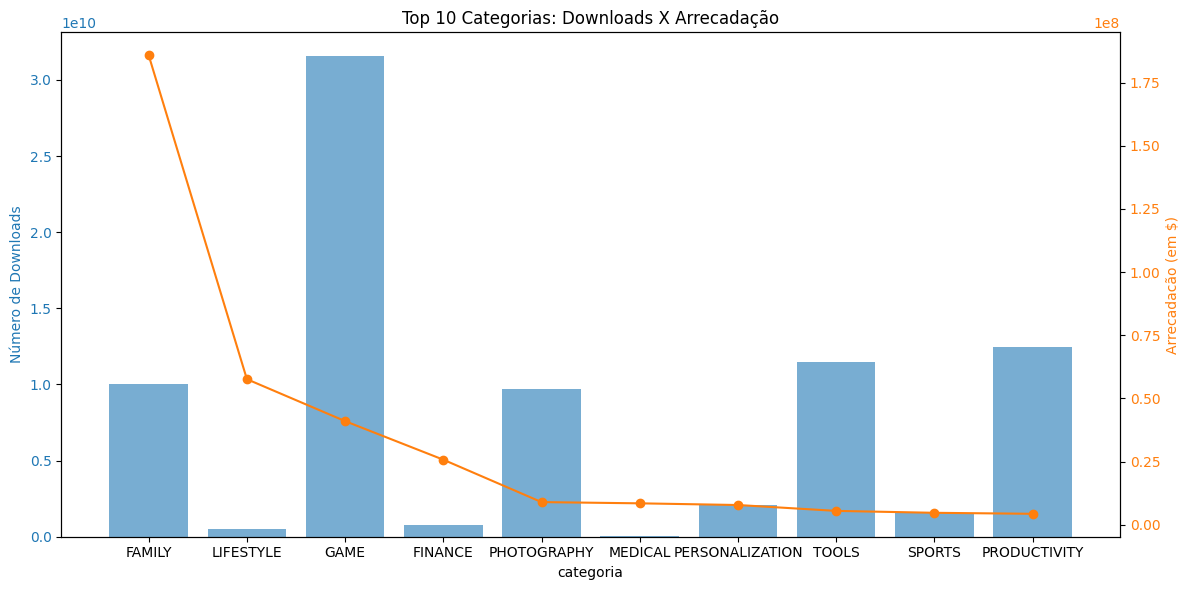

In [10]:
fig, ax1 = matplot.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('categoria')
ax1.set_ylabel('Número de Downloads', color=color)
ax1.bar(Lucro_categorias['categoria'], Lucro_categorias['Downloads'], color=color, alpha=0.6, label='Downloads')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Arrecadacão (em $)', color=color)
ax2.plot(Lucro_categorias['categoria'], Lucro_categorias['Arrecadacao'], color=color, marker='o', label='Arecadação')
ax2.tick_params(axis='y', labelcolor=color)

matplot.title('Top 10 Categorias: Downloads X Arrecadação')
ax1.grid(False)
ax2.grid(False)
matplot.xticks(rotation=45)

fig.tight_layout()
matplot.show()

##### 1. Para o primeiro passo os valores da coluna Ratings foram transformados em numeros pelo pandas.to_numeric e os erros em NaN. Para a exibição desejada das faixas de avaliação dos apps, elas precisaram ser claramente definidas: em bins os limites de cada faixa foram especificados e em labels a lista para identificar cada faixa foi criada e especificada nas faixas corretamente. A função pandas.cut categoriza corretamente cada faixa em seu devido lugar "cortando" os pedaços selecionados de cada faixa do dataset original e a coluna Avaliações armazena todos os valores conseguidos.
##### 2. qtd_apps Foi a variável criada para armazenar o número de aplicativos que foram obtidos através da função shape[0]. Em seguida o código value_counts conta cada faixa de avaliação que foi definida anteriormente em bins e labels e juntamente com sort_index agrupa e ordena corretamente os valores nas faixas corretas. A porcentagem e calculada com uma função aritmética comum dividindo a contagem feita de cada faixa pelo valor total de app e multiplicando tudo por 100. Por fim os resultados são exibidos com print e a condição for para cada valor de feixa ser alocada corretamente na resposta.

In [14]:
GooglePlay['Rating'] = pandas.to_numeric(GooglePlay['Rating'], errors='coerce')
bins = [0, 0.9, 1.9, 2.9, 3.9, 5]
labels = ['0-0.9', '1-1.9', '2-2.9', '3-3.9', '4-5']

GooglePlay['Avaliações'] = pandas.cut(GooglePlay['Rating'], bins=bins, labels=labels, right=True)
qtd_apps = GooglePlay.shape[0]

contagem_faixas = GooglePlay['Avaliações'].value_counts().sort_index()
porcentagem_faixas = (contagem_faixas / qtd_apps) * 100

for faixa, porcentagem in porcentagem_faixas.items():
    print(f'A porcentagem de Apps com nota na faixa {faixa} é: {porcentagem:.2f}%')

A porcentagem de Apps com nota na faixa 0-0.9 é: 0.00%
A porcentagem de Apps com nota na faixa 1-1.9 é: 0.53%
A porcentagem de Apps com nota na faixa 2-2.9 é: 2.17%
A porcentagem de Apps com nota na faixa 3-3.9 é: 16.08%
A porcentagem de Apps com nota na faixa 4-5 é: 67.08%


##### 1. Primeiramente foi criado o DataFrame df_heatmap e com reset_index os dados foram organizados em colunas para iniciar a criação do gráfico. Com columns as colunas do gráfico foram nomeadas de forma a ficarem mais claras na exibição da informação. em seguida a figura do gráfico e o tamanho foram definidos. A biblioteca Seaborn foi necessária nesse gráfico, as configurações do gráfico foram set_index para definir qual seria o índice do DataFrame o que permitiu definir os valores do eixo Y.
##### 2. O código .T fez a transposição do DataFrame invertendo as linhas e colunas, dessa forma as faixas de avaliação seriam apresentadas noe eixo x e as porcentagens no eixo y. Finalmente com sns.heatmap a biblioteca Seaborn criou o gráfico de calor o qual possui os parâmetros cmap='YlGnBu' que especificou as cores a serem usadas no gráfico, que inclui amarelo, verde e azul. annot=True mostra os valores das porcentagens dentro de cada faixa do gráfico e por fim fmt=".2f" determina as casas decimais a serem exibidas.
##### 3. Em seguida o titulo do gráfico, os nomes dos eixos x e y e o código de exibição do gráfico foram inseridos.

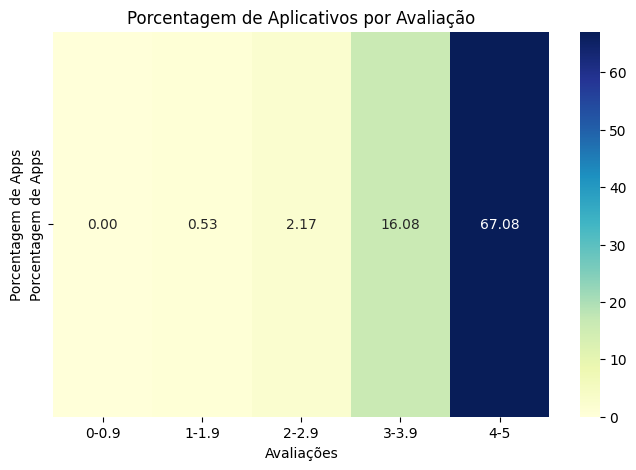

In [15]:
df_heatmap = porcentagem_faixas.reset_index()
df_heatmap.columns = ['Avaliações', 'Porcentagem de Apps']

matplot.figure(figsize=(8, 5))
sns.heatmap(df_heatmap.set_index('Avaliações').T, cmap='YlGnBu', annot=True, fmt=".2f")

matplot.title('Porcentagem de Aplicativos por Avaliação')
matplot.xlabel('Avaliações')
matplot.ylabel('Porcentagem de Apps')
matplot.show()
